In deze opdracht gaan we gebruik maken van de mogelijkheid om met coderen heel veel berekeningen te maken. We beginnen met een simpele ligger op 2 steunpunten, met een overspanning $l$ [m] en een lijnlast $q$ in [kN/m]

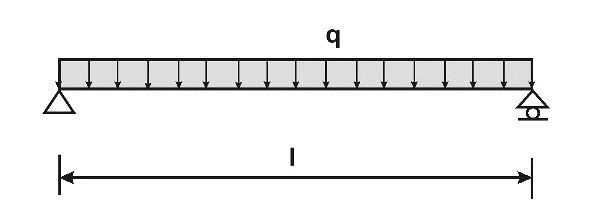

In [2]:
from IPython.display import Image
Image(filename='img/ligger.gif') 

Het maximale moment $M_{max}$ en doorbuiging $\delta_{max}$ kan worden berekend met onderstaande vergeetmenietjes, waarin:
$q$, de lijnlast in [kN/m]
$l$, de lengte van de overspanning in [m]
$E$, de stijfheid in [kN/m²]
$I$, het traagheidsmoment in [m4]

$$m_{max} = \frac{1}{8}q \cdot l^2$$
$$\delta_{max} = \frac{5}{384} \cdot \frac{q \cdot l^4}{E \cdot I}$$

We willen het maximale moment berekenen van een HEA200 profiel met een overspanning van 5 [m] en een belasting van 10[kN/m]. De Youngs modulus E is 210000 [MPa] en 3690 [cm4]. Schrijf een functie voor het berekenen van het moment en de doorbuiging.

In [3]:
def mmax(q: float, l: float) -> float:
    """
    Parameters
    ----------
    q : float
        Distributed load in kN
    l : float
        Length of beam and distributed load

    Returns
    -------
    float
        Maximum bending moment in beam
    """
    moment = 1/8*q*l**2
    return moment

print(mmax(10,5))

31.25


Binnen een ontwerpvraagstukken zijn parameters vaak onzeker, ze kunnen een beetje hoger zijn maar ook een beetje lager. Om hier rekening mee te houden worden vaak partiële factoren toegepast. Deze partiële factoren verhogen of verlagen een parameter en zorgen zo dat er voldoende veiligheid in een berekening zit. Voor de stertke van staal is de partiële factor bijvoorbeeld xx, voor beton xx en voor grond (ongedraineerde schuifsterkte) xx. De grootte van de partiele factor geeft een indruk van de onzekerheid rondom een parameter.

De onzekerheid rondom het gemiddelde $\mu$ (mu) van een parameter wordt aangegeven met een kansverdeling, [standaardafwijking](https://nl.wikipedia.org/wiki/Standaardafwijking) of een standaarddeviatie $\sigma$ (sigma). Er zijn verschillende Python bibliotheken waarmee je met onzekerheden kan rekenen.

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

We kunnen de Python bibliotheek NumPy gebruiken om waarden te laten genereren met een bepaald gemiddelde en variatiecoefficiënt. 

Stel we meten de kubusdruksterkte van een betonmengsel in het laboratorium. We meten dit 10 keer, de resultaten zijn in onderstaande lijst "resultaten" gegeven. Om de standaardafwijking $\sigma$ te bepalen moeten we eerst het gemiddelde (mean $\mu$) berekenen en vervolgens berekenen we de afstand van elk punt $x_{i}$ tot het gemiddelde. In onderstaande figuur met de grijze gestippelde lijn aangegeven. In formule vorm is dat:

$$\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu)^2}$$

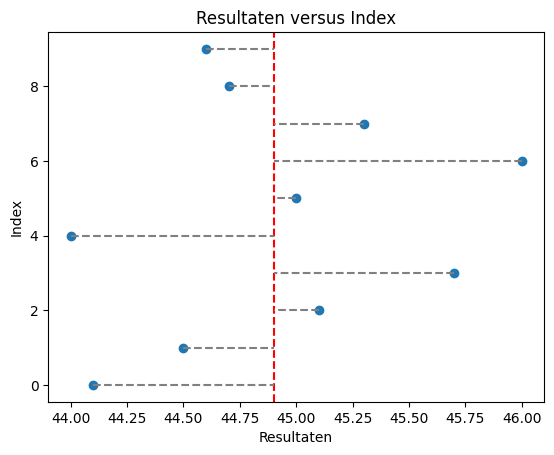

In [58]:
import pandas as pd

resultaten = [44.1, 44.5, 45.1, 45.7, 44.0, 45, 46, 45.3, 44.7, 44.6]
df = pd.DataFrame(resultaten, columns=['resultaten'])

mean = df['resultaten'].mean()

# Create a list of indices
indices = list(range(len(resultaten)))

# Plot resultaten versus the index of the list with switched axes
plt.scatter(resultaten, indices)

# Add title and labels
plt.title('Resultaten versus Index')
plt.ylabel('Index')
plt.xlabel('Resultaten')
plt.axvline(x=mean, color='r', linestyle='--') 
for i in range(len(resultaten)):
    plt.plot([resultaten[i], mean], [indices[i], indices[i]], color='gray', linestyle='--')

# Show the plot
plt.show()

We willen de gemiddelde afwijking van het gemiddelde weten, deze kunnen positief en negatief zijn wat niet handig is bij het bepalen van de gemiddelde afwijking. Om deze reden nemen we het kwadraat van de afstand tot het gemiddelde zodat we alleen positieve getallen overhouden. Zie onderstaande dataframe.

In [ ]:
df['afstand_mu'] = (df['resultaten'].mean() - df['resultaten'])

In [60]:
df['afstand_mu2'] = (df['resultaten'].mean() - df['resultaten'])**2
print(df.head())

   resultaten  afstand_mu  afstand_mu2
0        44.1         0.8         0.64
1        44.5         0.4         0.16
2        45.1        -0.2         0.04
3        45.7        -0.8         0.64
4        44.0         0.9         0.81


De som van alle afstanden in het kwadraat en daar het gemiddelde van is dan

In [70]:
print((df['afstand_mu2'].sum()/(len(df)-1))**0.5)

0.6497862896539307


In [71]:
print(df['resultaten'].std(ddof=1))

0.6497862896539307


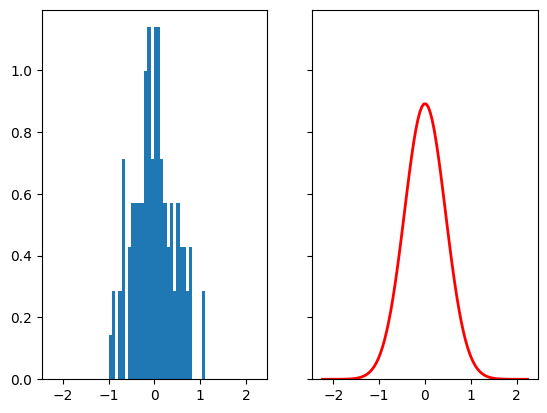

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 0.2**0.5 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)

fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
count, bins, ignored = ax[0].hist(s, 30, density=True)

xvalues = np.linspace(mu-5*sigma, mu+5*sigma, num=100)

ax[1].plot(xvalues, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (xvalues - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

plt.show()